## FIFA WOLRD CUP

## 1)Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:- Explore football skills and cluster football players based on their attributes.
* Task3:- Explore the data and attempt all the below asked questions in a
step by step manner:
    * Prepare a rank ordered list of top 10 countries with most players. Which
    countries are producing the most footballers that play at this level?
    * Plot the distribution of overall rating vs. age of players. Interpret what is the
    age after which a player stops improving?
    * Which type of offensive players tends to get paid the most: the striker, the
    right-winger, or the left-winger?

## 2) import the need libraries..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.cluster import DBSCAN,KMeans,AgglomerativeClustering,SpectralClustering,OPTICS
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler, QuantileTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA,FastICA 
from sklearn.neural_network import MLPClassifier,MLPRegressor
import tensorflow
from tensorflow.keras import regularizers
from keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dropout,Dense

#from mlxtend.frequent_patterns import apriori,association_rules
#from mlxtend.preprocessing import TransactionEncoder


## 3)load the data.

In [2]:
data=pd.read_csv("FIFA.csv")
df=pd.DataFrame(data)
df.head(pd.set_option("display.max_columns",None))

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

## 3) Domain analysis

* **sofifaid** - ID of the player.
* **player_url** - Total details of the players are available here.
* **short_name** - short Name of the player.
* **long_name** - Full name of the player.
* **Age** - Age of the player.
* **dob** - Date of birth of the player.
* **height_cm** - Height of the player in centimeters.
* **weight_kg** - Weight in kilograms.
* **nationality** - To which country the player belong to.
* **club** - To which club the player is playing to.
* **Overall** - General performance of the player rated between 1-99.
* **Potential** - Maximum Overall rating expected to be reached by a player rated between 1-99.
* **value_eur** - The amount with which the player has bought in Euros.
* **wage_eur** - wage of the player per week in Euros.
* **player_positions** - Position of the players on the pitch which determines their roles and responsibilities in the team    
* **PreferredFoot** - With which foot player likes to play most Right or Left.
* **international_reputation** - Reputation of the player internationally rated between 1 - 5.
* **WeakFoot** -  Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 - 5.
* **skill_moves** - Skill moves by a player rated between 1 - 5.
* **WorkRate** - Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. 
   This feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is applied as 0    for low, 0.5 for medium and 1 for high.
* **body_type** - Body type of the player.
* **real_face** - wether real face of the player is displayed or not, yes or No.
* **relese_clause_eur** - price value of the player while releasing in Euros.
* **player_tags** - player tags are the positions in which they are likely to play.
* **shooting** - shooting refers to the act of kicking the ball towards the goal in an attempt to score a goal
* **team_position** - Position in which the player plays.
* **team_jersey_number** - Number on the players jersey.
* **loaned_from** - from which team the player is loaned.
* **joined** - Date when the player is joined in the team.
* **contract_valid_until**- End date of the player in team.
* **pace** - Running speed of the player while playing, rated between 1-99
* **physic** - Personality of the player, rated between 1-99.
* **player_traits** - Unique skills of the player.

* **attacking_crossing** - Crossing skill of the player rated between 1-99. Cross is a long-range pass from wings to center.
* **attacking_finishing** - Finishing skill of the player rated between 1-99. Finishing in football refers to finish an attack     by scoring a goal.
* **attacking_heading_accuracy** - Player’s accuracy to pass or shoot by using his head rated between 1-99.
* **attacking_short_passing** - Player’s accuracy for short passes rated between 1-99.
* **attacking_volleys** - Player’s ability to perform volleys rated between 1-99.

* **skill_dribbling** - Dribbling skill of the player rated between 1-99. Dribbling is carrying the ball without losing while  
     moving in one particular direction.
* **skill_curve** - Player’s ability to curve the ball while passing or shooting rated between 1-99.
* **skill_fk_accuracy** - Player’s accuracy to score free kick goals rated between 1-99.
* **skill_long_passing** - Player’s accuracy for long passes rated between 1-99.
* **skill_ball_control** - Player’s ability to control the ball rated between 1-99.

* **movement_acceleration** - Shows how fast a player can reach his maximum sprint speed rated between 1-99.
* **movement_sprint_speed** - Speed rate of the player rated between 1-99.
* **movement_agility** - Gracefulness and quickness of the player while controlling the ball rated between 1-99.
* **movement_reactions** - Acting speed of the player to what happens in his environment rated between 1-99.
* **movement_balance** - Player’s ability to remain steady while running, carrying and controlling the ball rated between 1-99.

* **power_shot_power** - Player’s strength level of shooting the ball rated between 1-99.
* **power_jumping** - Player’s jumping skill rated between 1-99.
* **power_stamina** - Player’s ability to sustain his stamina level during the match rated between 1-99. Players with lower   
    stamina get tired fast.
* **power_strength** - Physical strength of the player rated between 1-99.
* **power_long_shots** - Player’s accuracy of shoots from long distances rated between 1-99.

* **mentality_aggression** - Aggression level of the player while pushing, pulling and tackling rated between 1-99.
* **mentality_interceptions** - Player’s ability to intercept the ball while opposite team’s players are passing rated between 
    1-99.
* **mentality_positioning** - Player’s ability to place himself in the right position to receive the ball or score goals rated      between 1- 99.
* **mentality_vision** - Player’s mental awareness about the other players in the team for passing rated between 1-99.
* **mentality_penalties** - Player’s accuracy to score goals from penalty rated between 1-99.
* **mentality_composure** - Player’s ability to control his calmness and frustration during the match rated between 1-99.

* **defending_marking** -Player’s ability to apply strategies to prevent opposing team from taking the ball rated between 1-99.
* **defending_standing_tackle** - Player’s ability to perform tackle (take the ball from the opposite player) while standing  
     rated between 1-99.
* **defending_sliding_tackle** - Player’s ability to perform tackle by sliding rated between 1-99. It is a defensive skill.

* **Abilities of the goal keeper while playing the game** 
  * goalkeeping_diving
  * goalkeeping_handling
  * goalkeeping_kicking
  * goalkeeping_positioning
  * goalkeeping_reflexes
* **player_positions** - Position of the players on the pitch which determines their roles and responsibilities in the team. 
     Forward positions in the FIFA 20 can be grouped as striker (ST: center striker, RS: right striker, LS: left striker), 
        forward (CF: center forward, RF: right forward, LF: left forward) and 
        winger (RW: right winger, LW: left winger).   
  * **Positions in fifa** 
    * **LS**: Positional skill. Player’s general ability while playing in Left Striker position rated between 1-99.
    * **ST**: Positional skill. Player’s general ability while playing in Center striker position rated between 1-99.
    * **RS**: Positional skill. Player’s general ability while playing in in Right Striker position rated between 1-99.
    * **LW**: Positional skill. Player’s general ability while playing in Left Wing position rated between 1-99.
    * **LF**: Positional skill. Player’s general ability while playing in Left Forward position rated between 1-99.
    * **CF**: Positional skill. Player’s general ability while playing in Center Forward position rated between 1-99.
    * **RF**: Positional skill. Player’s general ability while playing in Right Forward position rated between 1-99.
    * **RW**: Positional skill. Player’s general ability while playing in Right Wing position rated between 1-99.    

## 4)Data analysis..

In [3]:
df.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [4]:
df.tail()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14,32+2,32+2,32+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,31+2,33+2,33+2,33+2,33+2,33+2,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,48,56,40000,2000,CB,Right,1,2,2,Medium/Medium,Normal,No,72000.0,NaN,SUB,31.0,NaN,2019-02-01,2022.0,NaN,NaN,58.0,24.0,33.0,35.0,48.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9,33+2,33+2,33+2,33+2,32+2,32+2,32+2,33+2,33+2,33+2,33+2,35+2,36+2,36+2,36+2,35+2,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,48,56,40000,1000,CM,Right,1,2,2,Low/Medium,Lean,No,70000.0,NaN,SUB,38.0,NaN,2019-01-01,2019.0,NaN,NaN,54.0,35.0,44.0,45.0,48.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14,43+2,43+2,43+2,43+2,43+2,43+2,43+2,43+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,45+2,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,1000,CM,Right,1,2,2,Low/Low,Lean,No,70000.0,NaN,SUB,33.0,NaN,2019-02-01,2022.0,NaN,NaN,59.0,35.0,47.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13,43+2,43+2,43+2,45+2,44+2,44+2,44+2,45+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,48,51,40000,2000,CM,Right,1,3,2,Medium/Medium,Normal,No,NaN,NaN,SUB,37.0,Tianjin TEDA FC,NaN,2019.0,NaN,NaN,60.0,32.0,51.0,45.0,47.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44,30,48,58,25,40,34,35,52,46,54,64,52,49,71,41,64,40,61,30,54,47,29,52,38,42,52,42,48,8,12,14,9,10,42+2,42+2,42+2,44+2,43+2,43+2,43+2,44+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,46+2,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [5]:
df.sample(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
2051,201878,https://sofifa.com/player/201878/valentin-eyss...,V. Eysseric,Valentin Eysseric,27,1992-03-25,181,73,France,Fiorentina,75,75,7000000,47000,"LW, RW",Right,2,4,3,Medium/Medium,Normal,No,11900000.0,NaN,SUB,16.0,NaN,2017-08-09,2021.0,NaN,NaN,69.0,72.0,78.0,76.0,43.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Argues with Officials, Crowd Favourite",80,70,52,78,70,77,76,76,76,78,68,69,75,70,69,74,57,59,64,76,65,35,75,77,70,70,60,34,26,9,13,10,11,8,70+2,70+2,70+2,74+2,74+2,74+2,74+2,74+2,75+2,75+2,75+2,74+2,70+2,70+2,70+2,74+2,59+2,59+2,59+2,59+2,59+2,55+2,51+2,51+2,51+2,55+2
12623,205311,https://sofifa.com/player/205311/lee-erwin/20/...,L. Erwin,Lee Erwin,25,1994-03-19,188,79,Scotland,Ross County FC,63,68,500000,2000,ST,Right,1,3,2,High/Medium,Normal,No,913000.0,NaN,SUB,18.0,NaN,2019-07-23,2023.0,NaN,NaN,67.0,61.0,50.0,61.0,27.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,62,60,56,56,61,40,29,45,61,67,67,69,56,55,63,72,73,72,58,32,27,62,61,68,60,30,15,19,16,10,13,15,14,61+2,61+2,61+2,59+2,60+2,60+2,60+2,59+2,59+2,59+2,59+2,58+2,54+2,54+2,54+2,58+2,44+2,42+2,42+2,42+2,44+2,42+2,39+2,39+2,39+2,42+2
15070,239308,https://sofifa.com/player/239308/tyron-ivanof/...,T. Ivanof,Tyron Ivanof,21,1997-07-17,176,70,Belgium,KV Kortrijk,60,67,290000,2000,"CAM, RM, LM",Right,1,3,3,Medium/Medium,Lean,No,493000.0,NaN,LM,19.0,NaN,2017-05-08,2021.0,NaN,NaN,63.0,48.0,58.0,67.0,28.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,48,40,62,47,66,52,60,51,67,72,56,69,58,79,51,72,30,46,46,47,28,46,57,44,52,21,28,39,10,10,14,7,5,53+2,53+2,53+2,59+2,57+2,57+2,57+2,59+2,59+2,59+2,59+2,58+2,53+2,53+2,53+2,58+2,46+2,43+2,43+2,43+2,46+2,43+2,39+2,39+2,39+2,43+2
13150,247351,https://sofifa.com/player/247351/mateusz-bogus...,M. Bogusz,Mateusz Bogusz,17,2001-08-22,175,68,Poland,Leeds United,62,79,600000,1000,"CAM, CM",Right,1,3,2,Medium/Medium,Normal,No,1500000.0,NaN,SUB,44.0,NaN,2019-01-29,2021.0,NaN,NaN,74.0,61.0,56.0,65.0,35.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,59,39,63,47,65,52,62,56,64,75,73,75,51,72,70,50,61,61,64,51,25,52,53,49,61,41,34,38,12,11,9,13,7,59+2,59+2,59+2,60+2,60+2,60+2,60+2,60+2,60+2,60+2,60+2,59+2,55+2,55+2,55+2,59+2,49+2,48+2,48+2,48+2,49+2,47+2,43+2,43+2,43+2,47+2


In [6]:
print("shape :",df.shape)
print("size :",df.size)

shape : (18278, 104)
size : 1900912


In [7]:
df.iloc[:,0:60].columns # find the first 60 features names

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential',
       'value_eur', 'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'release_clause_eur', 'player_tags',
       'team_position', 'team_jersey_number', 'loaned_from', 'joined',
       'contract_valid_until', 'nation_position', 'nation_jersey_number',
       'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_

In [8]:
df.iloc[:,60:105].columns 

Index(['power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'ls', 'st', 'rs',
       'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
       'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb'],
      dtype='object')

In [9]:
print("shape :",df.shape)
print("size :",df.size)

shape : (18278, 104)
size : 1900912


In [10]:
df.count() # check not empty values in each features.

sofifa_id     18278
player_url    18278
short_name    18278
long_name     18278
age           18278
              ...  
lb            16242
lcb           16242
cb            16242
rcb           16242
rb            16242
Length: 104, dtype: int64

In [11]:
df.nunique().sort_values() # find the number of unique values in each features.

real_face                       2
preferred_foot                  2
skill_moves                     5
international_reputation        5
weak_foot                       5
                            ...  
dob                          6142
short_name                  17354
long_name                   18218
player_url                  18278
sofifa_id                   18278
Length: 104, dtype: int64

In [12]:
df.iloc[:,0:50].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   player_url                  18278 non-null  object 
 2   short_name                  18278 non-null  object 
 3   long_name                   18278 non-null  object 
 4   age                         18278 non-null  int64  
 5   dob                         18278 non-null  object 
 6   height_cm                   18278 non-null  int64  
 7   weight_kg                   18278 non-null  int64  
 8   nationality                 18278 non-null  object 
 9   club                        18278 non-null  object 
 10  overall                     18278 non-null  int64  
 11  potential                   18278 non-null  int64  
 12  value_eur                   18278 non-null  int64  
 13  wage_eur                    182

In [13]:
df.iloc[:,50:104].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   skill_curve                18278 non-null  int64 
 1   skill_fk_accuracy          18278 non-null  int64 
 2   skill_long_passing         18278 non-null  int64 
 3   skill_ball_control         18278 non-null  int64 
 4   movement_acceleration      18278 non-null  int64 
 5   movement_sprint_speed      18278 non-null  int64 
 6   movement_agility           18278 non-null  int64 
 7   movement_reactions         18278 non-null  int64 
 8   movement_balance           18278 non-null  int64 
 9   power_shot_power           18278 non-null  int64 
 10  power_jumping              18278 non-null  int64 
 11  power_stamina              18278 non-null  int64 
 12  power_strength             18278 non-null  int64 
 13  power_long_shots           18278 non-null  int64 
 14  mental

In [14]:
# split the numerical and categorical column
numerical= df.select_dtypes(include=["float","int"])
print(numerical.shape)
categorical=df.select_dtypes(include=["object"])
print(categorical.shape)

(18278, 61)
(18278, 43)


## 5)Exploratory data analysis (EDA) 

#### 1)TOP 20 players in overall

In [15]:
# We get the names and overals from the data
va=df[["short_name","overall"]]
va.rename({"short_name":"players name","overall":"BestOverallRating"},axis=1,inplace=True)
va.head(20)

,players name,BestOverallRating
0,L. Messi,94
1,Cristiano Ronaldo,93
2,Neymar Jr,92
3,J. Oblak,91
4,E. Hazard,91
5,K. De Bruyne,91
6,M. ter Stegen,90
7,V. van Dijk,90
8,L. Modrić,90
9,M. Salah,90


<AxesSubplot:xlabel='BestOverallRating', ylabel='players name'>

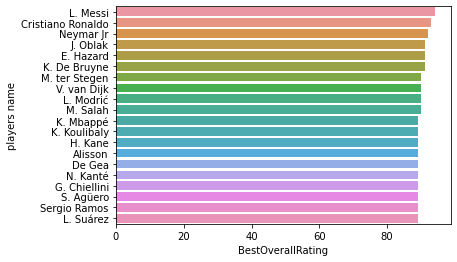

In [16]:
sns.barplot(y="players name",x="BestOverallRating",data=va.iloc[0:20,:])

##### 2) Which foot mostly used in fottballers for FIFA 20

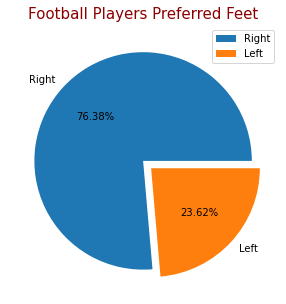

In [17]:
preferred_foot_labels = df["preferred_foot"].value_counts().index # (Right,Left) 
preferred_foot_values = df["preferred_foot"].value_counts().values # (Right Values, Left Values)
plt.figure(figsize = (5,5))
plt.pie(preferred_foot_values, labels=preferred_foot_labels,explode=(0,0.1), autopct='%1.2f%%')
plt.title('Football Players Preferred Feet',color = 'darkred',fontsize = 15)
plt.legend()

#### 3)TOP 20 most Valuable Players in Fifa 20

In [18]:
val=df[["value_eur","short_name"]].sort_values(by="value_eur",ascending=False,ignore_index=True).head(20)
val.rename({"value_eur":"player value","short_name":"player name"},inplace=True,axis=1)
val


,player value,player name
0,105500000,Neymar Jr
1,95500000,L. Messi
2,93500000,K. Mbappé
3,90000000,K. De Bruyne
4,90000000,E. Hazard
5,83000000,H. Kane
6,80500000,M. Salah
7,78000000,V. van Dijk
8,77500000,J. Oblak
9,76500000,P. Dybala


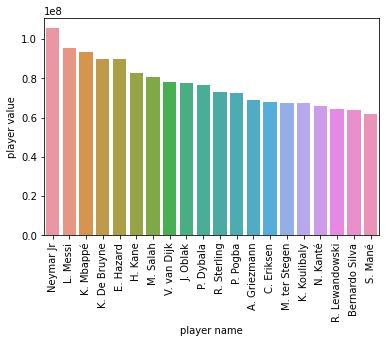

In [19]:
sns.barplot(y="player value",x="player name",data=val.iloc[0:20,:])
plt.xticks(fontsize =10,rotation=90)
plt.show()

#### 4)TOP 20 valuable players country name in Fifa 20

In [20]:
val1=df[["nationality","value_eur","short_name"]]
val1.rename({"nationality":"country name","value_eur":"value","short_name":"player name"},axis=1,inplace=True)
val1.sort_values(by="value",ascending=False,ignore_index=True).head(20)

,country name,value,player name
0,Brazil,105500000,Neymar Jr
1,Argentina,95500000,L. Messi
2,France,93500000,K. Mbappé
3,Belgium,90000000,K. De Bruyne
4,Belgium,90000000,E. Hazard
5,England,83000000,H. Kane
6,Egypt,80500000,M. Salah
7,Netherlands,78000000,V. van Dijk
8,Slovenia,77500000,J. Oblak
9,Argentina,76500000,P. Dybala


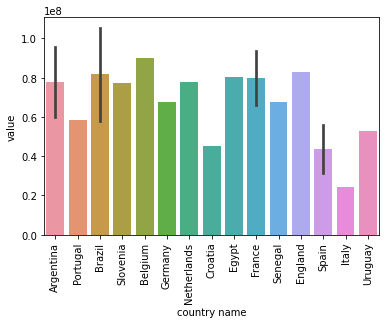

In [21]:
sns.barplot(y="value",x="country name",data=val1.iloc[0:20,:])
plt.xticks(fontsize =10,rotation=90)
plt.show()

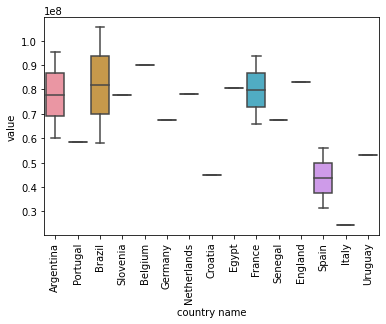

In [22]:
sns.boxplot(y="value",x="country name",data=val1.iloc[0:20,:])
plt.xticks(fontsize =10,rotation=90)
plt.show()

#### 5) Plot distribution of overall rating vs age of players.

<AxesSubplot:xlabel='age', ylabel='Count'>

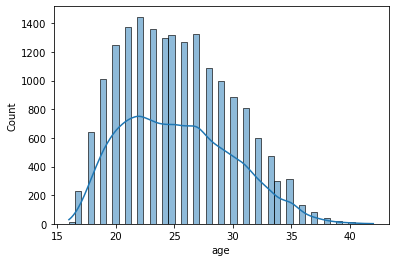

In [23]:
sns.histplot(x="age",data=df,kde=True)

In [24]:
c=df[["age","overall","short_name"]].sort_values(by="overall",ascending=False)
c

,age,overall,short_name
0,32,94,L. Messi
1,34,93,Cristiano Ronaldo
2,27,92,Neymar Jr
3,26,91,J. Oblak
4,28,91,E. Hazard
...,...,...,...
18250,19,48,R. Roache
18251,19,48,G. Sykes-Kenworthy
18252,18,48,A. Aksungur
18253,18,48,N. Morley


<AxesSubplot:xlabel='age', ylabel='overall'>

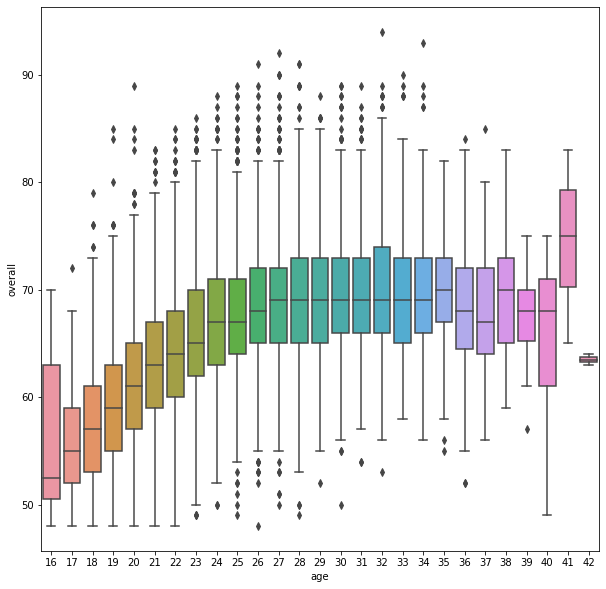

In [25]:
plt.figure(figsize=(10,10))
sns.boxplot(x="age",y="overall",data=c)

#### 6) Select top 10 rank orders country list in most players.

In [26]:
top_rank= df[['short_name','club','shooting','pace','passing','dribbling',
              'defending','physic',"international_reputation","nationality"]].groupby('nationality').mean().sort_values('shooting',ascending=False).mean(axis=1)

In [27]:
top_rank.head(10)

nationality
Chad                   57.857143
São Tomé & Príncipe    53.571429
Bahrain                53.571429
Eritrea                53.857143
Liberia                53.142857
Korea DPR              50.285714
Syria                  53.857143
Ethiopia               53.714286
Israel                 54.017857
Belize                 51.857143
dtype: float64

In [28]:
def transform_positions(df):
    for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
        df.loc[df['player_position'] == i , 'player_position'] = 'Striker' 
    
    for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
        df.loc[df['player_position'] == i , 'player_position'] = 'Midfielder' 
    
    for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB']:
        df.loc[df['player_position'] == i , 'player_position'] = 'Defender'
    for i in ["GK"]:
        df.loc[df['player_position'] == i , 'player_position'] = 'Goal Keeper'

In [29]:
def select_pos(col):
    new_val=[] 
    for i in col:
        x=str(i).split(',')[0]
        new_val.append(x)
    return new_val

In [30]:
df['player_position']=select_pos(df['player_positions'])
df.drop(['player_positions'],axis=1,inplace=True)
transform_positions(df)

In [31]:
df['player_position'].unique()

array(['Striker', 'Goal Keeper', 'Midfielder', 'Defender'], dtype=object)

<AxesSubplot:xlabel='player_position', ylabel='count'>

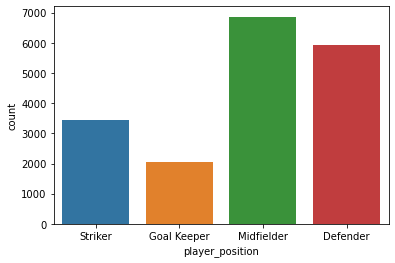

In [63]:
sns.countplot(x="player_position",data=df)

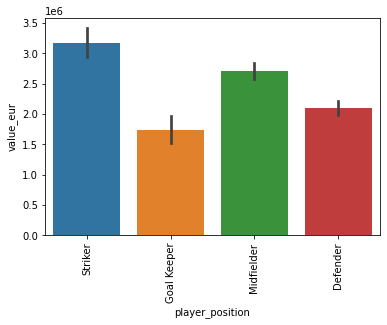

In [64]:
sns.barplot(y="value_eur",x="player_position",data=df)
plt.xticks(fontsize=10,rotation=90)
plt.show()

#### 7) outlier detection.

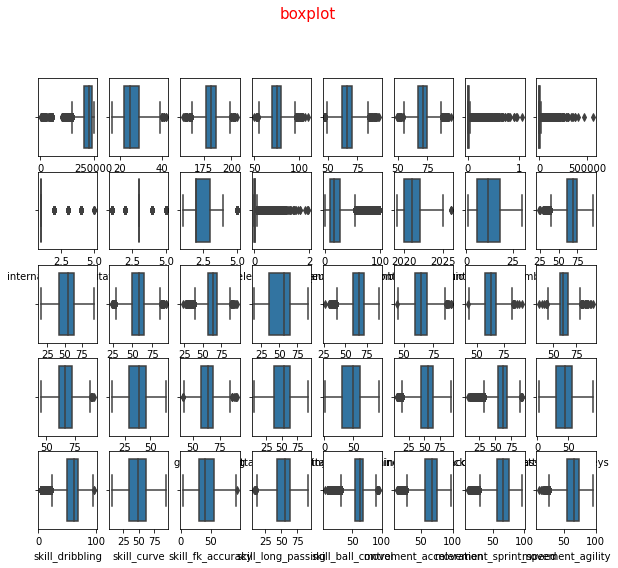

In [33]:
plt.figure(figsize=(10,10))
no=1
for i in numerical.iloc[:,0:40]:
    if no<=48:
        plt.suptitle("boxplot",color="red",fontsize=15)
        plt.subplot(6,8,no)
        sns.boxplot(x=numerical[i],data=df)
        plt.xlabel(i)
    no+=1

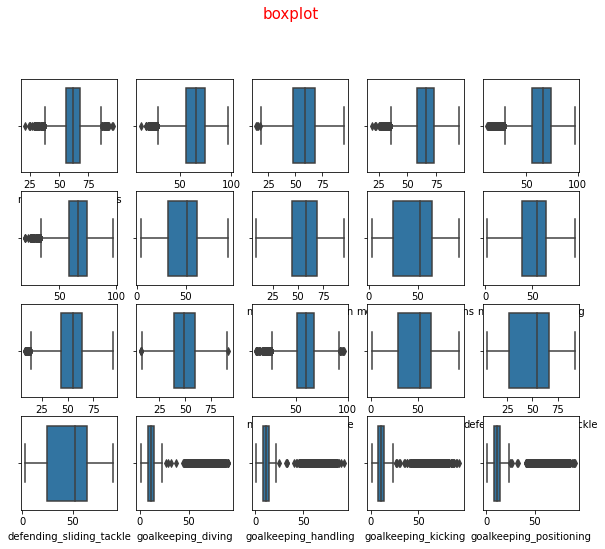

In [34]:
plt.figure(figsize=(10,10))
no=1
for i in numerical.iloc[:,40:60]:
    if no<=25:
        plt.suptitle("boxplot",color="red",fontsize=15)
        plt.subplot(5,5,no)
        sns.boxplot(x=numerical[i],data=df)
        plt.xlabel(i)
    no+=1

#### 7) data distribution analysis.

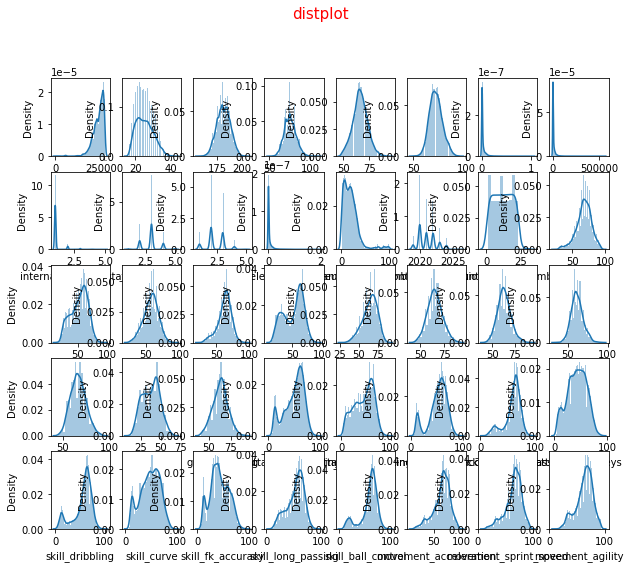

In [35]:
plt.figure(figsize=(10,10))
no=1
for i in numerical.iloc[:,0:40]:
    if no<=48:
        plt.suptitle("distplot",color="red",fontsize=15)
        plt.subplot(6,8,no)
        sns.distplot(x=numerical[i])
        plt.xlabel(i)
    no+=1

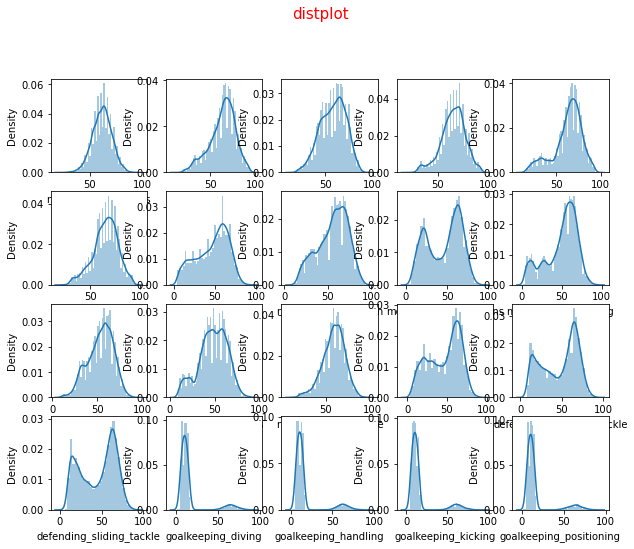

In [36]:
plt.figure(figsize=(10,10))
no=1
for i in numerical.iloc[:,40:60]:
    if no<=25:
        plt.suptitle("distplot",color="red",fontsize=15)
        plt.subplot(5,5,no)
        sns.distplot(x=numerical[i])
        plt.xlabel(i)
    no+=1

<AxesSubplot:xlabel='international_reputation', ylabel='nationality'>

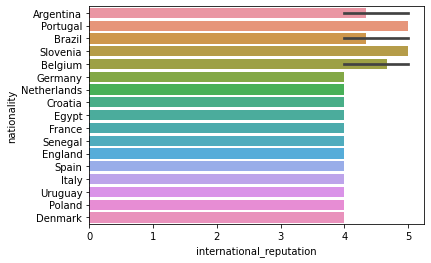

In [37]:
sns.barplot(x=df["international_reputation"].sort_values(ascending=False,ignore_index=True),y="nationality",data=df.iloc[0:30])

## Data Preprocessing..



### 1) NAN(empty value ) handled 

In [38]:
df.iloc[:,0:20].isna().sum()

sofifa_id                   0
player_url                  0
short_name                  0
long_name                   0
age                         0
dob                         0
height_cm                   0
weight_kg                   0
nationality                 0
club                        0
overall                     0
potential                   0
value_eur                   0
wage_eur                    0
preferred_foot              0
international_reputation    0
weak_foot                   0
skill_moves                 0
work_rate                   0
body_type                   0
dtype: int64

In [39]:
df.iloc[:,20:40].isna().sum()

real_face                   0
release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
dtype: int64

In [40]:
df.iloc[:,40:60].isna().sum()

gk_speed                      16242
gk_positioning                16242
player_traits                 10712
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility                  0
movement_reactions                0
movement_balance                  0
power_shot_power                  0
power_jumping                     0
dtype: int64

In [41]:
df.iloc[:,60:80].isna().sum()

power_stamina                   0
power_strength                  0
power_long_shots                0
mentality_aggression            0
mentality_interceptions         0
mentality_positioning           0
mentality_vision                0
mentality_penalties             0
mentality_composure             0
defending_marking               0
defending_standing_tackle       0
defending_sliding_tackle        0
goalkeeping_diving              0
goalkeeping_handling            0
goalkeeping_kicking             0
goalkeeping_positioning         0
goalkeeping_reflexes            0
ls                           2036
st                           2036
rs                           2036
dtype: int64

In [42]:
df.iloc[:,80:105].isna().sum()

lw                 2036
lf                 2036
cf                 2036
rf                 2036
rw                 2036
lam                2036
cam                2036
ram                2036
lm                 2036
lcm                2036
cm                 2036
rcm                2036
rm                 2036
lwb                2036
ldm                2036
cdm                2036
rdm                2036
rwb                2036
lb                 2036
lcb                2036
cb                 2036
rcb                2036
rb                 2036
player_position       0
dtype: int64

In [43]:
# impute the null values
df["release_clause_eur"].fillna(value=df["release_clause_eur"].median(),inplace=True)
df["team_jersey_number"].fillna(value=df["team_jersey_number"].median(),inplace=True)
df["contract_valid_until"].fillna(value=df["contract_valid_until"].median(),inplace=True)
df["nation_position"].fillna("SUB",inplace=True)
df["team_position"].fillna("SUB",inplace=True)
df["nation_jersey_number"].fillna(value=df["nation_jersey_number"].median(),inplace=True)
df["pace"].fillna(value=df["pace"].median(),inplace=True)
df["shooting"].fillna(value=df["shooting"].median(),inplace=True)
df["passing"].fillna(value=df["passing"].median(),inplace=True)
df["dribbling"].fillna(value=df["dribbling"].median(),inplace=True)
df["defending"].fillna(value=df["defending"].median(),inplace=True)
df["physic"].fillna(value=df["physic"].median(),inplace=True)
df["gk_diving"].fillna(value=df["gk_handling"].median(),inplace=True)
df["gk_handling"].fillna(value=df["gk_handling"].median(),inplace=True)
df["gk_kicking"].fillna(value=df["gk_kicking"].median(),inplace=True)
df["gk_reflexes"].fillna(value=df["gk_reflexes"].median(),inplace=True)
df["gk_speed"].fillna(value=df["gk_speed"].median(),inplace=True)
df["gk_positioning"].fillna(value=df["gk_positioning"].median(),inplace=True)


#### 2)Outlier handling

In [44]:
q1=df.quantile(0.25,interpolation="midpoint")
q2=df.quantile(0.50,interpolation="midpoint")
q3=df.quantile(0.75,interpolation="midpoint")
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
outlier=((df>upper)|(df<lower)).sum()
pergentage=((outlier)/(len(df)))*100
print("percentage :",pergentage[pergentage<=50])

percentage : age                            0.103950
attacking_crossing             0.000000
attacking_finishing            0.000000
attacking_heading_accuracy     5.843090
attacking_short_passing        9.486815
                                ...    
value_eur                     13.737827
wage_eur                      12.911697
weak_foot                     37.919904
weight_kg                      0.399387
work_rate                      0.000000
Length: 104, dtype: float64


In [45]:
# check the duplicated values..
df.duplicated().sum()

0

In [46]:
numerical.describe() # used to understand the all statistical relation of given data set.

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

In [47]:
df.corr()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.736680,-0.093464,-0.203620,-0.445061,0.042015,-0.159848,-0.228084,-0.360765,-0.092250,-0.079645,-0.143545,0.176685,0.143226,0.021868,0.142703,-0.249698,-0.332460,-0.203422,-0.208889,-0.336152,-0.185430,-0.179639,-0.157994,-0.165842,-0.139524,-0.199735,-0.137097,-0.098612,-0.120116,-0.146427,-0.166148,-0.045166,-0.172646,-0.200029,-0.199998,-0.110933,0.119183,0.117895,-0.032759,-0.439012,0.040989,-0.283919,-0.189141,-0.077519,-0.279780,-0.178362,-0.232305,-0.164695,-0.102409,-0.229932,-0.147125,-0.385061,-0.131479,-0.087414,-0.068464,-0.113073,-0.116270,-0.114658,-0.123064,-0.113487
age,-0.736680,1.000000,0.081391,0.237169,0.464305,-0.262872,0.081513,0.151031,0.259582,0.073988,0.045277,0.067178,-0.224911,-0.122521,-0.022835,-0.182084,0.222684,0.305767,0.152329,0.244915,0.402985,0.179823,0.181005,0.162787,0.164462,0.121529,0.206149,0.128189,0.078531,0.149946,0.135681,0.143063,0.016735,0.141891,0.190419,0.184008,0.088359,-0.153145,-0.144310,-0.023131,0.463331,-0.089609,0.261916,0.185964,0.115859,0.341852,0.161616,0.260420,0.196346,0.086503,0.195372,0.141375,0.370149,0.157007,0.116857,0.101534,0.110313,0.112929,0.112615,0.121381,0.111811
height_cm,-0.093464,0.081391,1.000000,0.768816,0.039945,-0.002432,0.009527,0.019547,0.037935,-0.175200,-0.429980,0.010800,-0.032039,-0.013880,-0.023704,-0.374651,-0.168298,-0.252518,-0.354167,0.227469,0.455466,0.136114,0.041612,0.056975,0.047277,-0.043416,0.008594,-0.498103,-0.376091,0.010296,-0.371445,-0.351059,-0.500107,-0.447578,-0.410071,-0.335343,-0.425013,-0.558354,-0.474736,-0.633770,-0.019698,-0.789806,-0.174280,-0.041149,-0.291791,0.535400,-0.384213,-0.045307,-0.053148,-0.445302,-0.371546,-0.335786,-0.159296,-0.077038,-0.068334,-0.076953,0.367433,0.367163,0.364992,0.367097,0.367375
weight_kg,-0.203620,0.237169,0.768816,1.000000,0.156522,-0.011738,0.051782,0.065946,0.090854,-0.128568,-0.352060,0.047365,-0.081342,-0.027093,-0.022614,-0.333388,-0.071776,-0.155224,-0.252946,0.225065,0.533418,0.166786,0.085437,0.097059,0.086883,-0.012703,0.060672,-0.401643,-0.291504,0.039679,-0.291090,-0.260903,-0.415861,-0.349230,-0.310277,-0.259906,-0.340154,-0.493125,-0.420978,-0.545514,0.090986,-0.669125,-0.055855,0.031246,-0.219505,0.614334,-0.279097,0.030643,-0.028345,-0.355329,-0.280242,-0.246309,-0.054167,-0.049683,-0.052770,-0.064492,0.342329,0.343211,0.339805,0.344397,0.343126
overall,-0.445061,0.464305,0.039945,0.156522,1.000000,0.646650,0.638230,0.573578,0.475557,0.230276,0.401261,0.609801,-0.191900,0.153036,-0.019409,0.144498,0.458698,0.632743,0.553792,0.302802,0.476817,0.311343,0.336226,0.279496,0.342335,0.182297,0.349197,0.389078,0.342372,0.345784,0.503157,0.394152,0.370639,0.415521,0.389790,0.487289,0.457052,0.186320,0.199009,0.253464,0.864526,0.103872,0.567504,0.267553,0.370344,0.361543,0.425081,0.399434,0.315582,0.356025,0.509251,0.347950,0.719992,0.303075,0.249891,0.219560,-0.013239,-0.013716,-0.017393,-0.006408,-0.012775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

# Feature Engineering

* encoder concept
* feature selection
* dimensional reduction


In [48]:
# convert the categorical column into numerical column using label encoder
enc=LabelEncoder()
df.loc[:,["preferred_foot","work_rate","body_type","real_face","nation_position","team_position"]]=\
df.loc[:,["preferred_foot","work_rate","body_type","real_face","nation_position","team_position"]].apply(enc.fit_transform)

In [49]:
df3=df.drop(["sofifa_id","player_url","short_name","long_name","dob","nationality","club","player_tags","loaned_from","joined","player_traits","ls","st","rs",
         "lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm","cm","rcm","rm","lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb","player_position"],axis=1)

In [50]:
# clean dataset
df3

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,team_position,team_jersey_number,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,0,5,4,4,7,4,1,195800000.0,25,10.0,2021.0,25,12.0,87.0,92.0,92.0,96.0,39.0,66.0,63.0,63.0,61.0,66.0,39.0,64.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,1,5,4,5,1,1,1,96500000.0,14,7.0,2022.0,12,7.0,90.0,93.0,82.0,89.0,35.0,78.0,63.0,63.0,61.0,66.0,39.0,64.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,1,5,5,5,2,5,1,195200000.0,0,10.0,2022.0,13,10.0,91.0,85.0,87.0,95.0,32.0,58.0,63.0,63.0,61.0,66.0,39.0,64.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,1,3,3,1,8,6,1,164700000.0,5,13.0,2023.0,5,1.0,69.0,54.0,58.0,64.0,56.0,66.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,1,4,4,4,2,6,1,184500000.0,14,7.0,2024.0,10,10.0,91.0,83.0,86.0,94.0,35.0,66.0,63.0,63.0,61.0,66.0,39.0,64.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,22,186,79,48,56,40000,2000,1,1,3,2,6,6,0,70000.0,21,36.0,2019.0,25,12.0,57.0,23.0,28.0,33.0,47.0,51.0,63.0,63.0,61.0,66.0,39.0,64.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,22,177,66,48,56,40000,2000,1,1,2,2,8,6,0,72000.0,28,31.0,2022.0,25,12.0,58.0,24.0,33.0,35.0,48.0,48.0,63.0,63.0,61.0,66.0,39.0,64.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,19,186,75,48,56,40000,1000,1,1,2,2,5,3,0,70000.0,28,38.0,2019.0,25,12.0,54.0,35.0,44.0,45.0,48.0,51.0,63.0,63.0,61.0,66.0,39.0,64.0,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,18,185,74,48,54,40000,1000,1,1,2,2,4,3,0,70000.0,28,33.0,2022.0,25,12.0,59.0,35.0,47.0,47.0,45.0,52.0,63.0,63.0,61.0,66.0,39.0,64.0,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


# Model Build and Evaluate the model..

In [51]:
#remove the outlier using LsolationForest or LocalOutlierFactor method
"""from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
iso=IsolationForest(n_estimators=100,max_samples='auto',random_state=np.random.RandomState(42))
iso.fit(df3)
c=iso.predict(df3)==1
df4=df3[c]
df4.shape"""

"from sklearn.ensemble import IsolationForest\nfrom sklearn.neighbors import LocalOutlierFactor\niso=IsolationForest(n_estimators=100,max_samples='auto',random_state=np.random.RandomState(42))\niso.fit(df3)\nc=iso.predict(df3)==1\ndf4=df3[c]\ndf4.shape"

In [52]:
# scaling the model
sc=StandardScaler()
sc.fit_transform(df3)

array([[ 1.44233274, -1.68159832, -0.46489103, ..., -0.07301019,
        -0.1381906 , -0.48287516],
       [ 1.87180879,  0.83439432,  1.0959349 , ..., -0.07301019,
        -0.1381906 , -0.31655621],
       [ 0.36864262, -0.94160048, -1.0324641 , ..., -0.07301019,
        -0.07983402, -0.31655621],
       ...,
       [-1.34926158,  0.68639475, -0.03921123, ..., -0.3739755 ,
        -0.60504324, -0.15023727],
       [-1.5639996 ,  0.53839519, -0.1811045 , ..., -0.19339631,
        -0.19654718, -0.20567692],
       [ 0.15390459,  0.09439648,  0.38646857, ..., -0.13320325,
        -0.4299735 , -0.37199586]])

Text(0.5, 1.0, 'Elbow method')

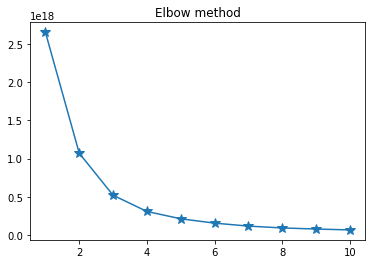

In [53]:
# elbow method to find the value..
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=10,max_iter=1000)
    model.fit(df3)
    wcss.append(model.inertia_)#(sumation of (x)-(i)^2)
plt.plot(range(1,11),wcss,marker="*",markersize=10)
plt.title("Elbow method")

### 1)kmeans clustering

In [54]:
from sklearn.metrics import silhouette_score
model=KMeans(n_clusters=3,algorithm="auto",random_state=4,max_iter=1000,n_init=100,)
model.fit(df3)
model.labels_
silhouette_score(df3,model.labels_)

0.8267051703049333

### 2)AgglomerativeClustering

In [55]:
model1=AgglomerativeClustering(n_clusters=3)
model1.fit(df3)
model1.labels_
silhouette_score(df3,model1.labels_)


0.830615582551665

### cluster formimg.

In [56]:
df3["cluster"]=pd.DataFrame(model.labels_)


In [57]:
df["cluster"]=pd.DataFrame(model.labels_)
df4=df[["short_name","cluster"]]
df4

,short_name,cluster
0,L. Messi,2
1,Cristiano Ronaldo,2
2,Neymar Jr,2
3,J. Oblak,2
4,E. Hazard,2
...,...,...
18273,Shao Shuai,0
18274,Xiao Mingjie,0
18275,Zhang Wei,0
18276,Wang Haijian,0


In [58]:
df4.to_csv("result.csv")

In [59]:
pca=PCA(n_components=2)
c=pca.fit_transform(df3.iloc[:,0:67])
c

array([[ 2.12659951e+08, -5.26832736e+06],
       [ 1.07460859e+08,  7.48571192e+06],
       [ 2.16720606e+08,  3.88886100e+06],
       ...,
       [-5.04812919e+06, -1.40645301e+05],
       [-5.04812919e+06, -1.40645301e+05],
       [-4.04443025e+06, -6.59768417e+05]])

In [60]:
new_data=pd.DataFrame(c,columns=["PC1","PC1"])
new_data

,PC1,PC1
0,2.126600e+08,-5.268327e+06
1,1.074609e+08,7.485712e+06
2,2.167206e+08,3.888861e+06
3,1.767662e+08,-6.970036e+06
4,2.000961e+08,-4.962545e+06
...,...,...
18273,-5.048128e+06,-1.406428e+05
18274,-5.046351e+06,-1.415616e+05
18275,-5.048129e+06,-1.406453e+05
18276,-5.048129e+06,-1.406453e+05


In [61]:
final=pd.concat([new_data,df3.iloc[:,66]],axis=1)
final

,PC1,PC1,cluster
0,2.126600e+08,-5.268327e+06,2
1,1.074609e+08,7.485712e+06,2
2,2.167206e+08,3.888861e+06,2
3,1.767662e+08,-6.970036e+06,2
4,2.000961e+08,-4.962545e+06,2
...,...,...,...
18273,-5.048128e+06,-1.406428e+05,0
18274,-5.046351e+06,-1.415616e+05,0
18275,-5.048129e+06,-1.406453e+05,0
18276,-5.048129e+06,-1.406453e+05,0
